# ISSUE 3

## imports

In [16]:
import os
from os.path import isfile
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pprint
import skimage.metrics
import matplotlib.pyplot as plt

## Parameters

In [24]:
param = {
    "path_base": "/tmp/",
    "folders": ["din", "dout"],    
    "url_video": "https://media.xiph.org/video/derf/y4m/galleon_422_qcif.y4m",
    "name_video": "galleon_422_qcif.y4m",     
    "limite": 5, 
    "bandas": ["LL","LH","HL","HH"],
    "T": 4, 
    "q_inicial": 2, 
    "q_step": 128, 
    "distorsion_metric": "MSE", 
    "predictor": 2,
    "quantizers" : ["midtread", "midrise", "deadzone"]    
}
resultados = {   
    "size_original" : 0,
    "q_step": [2,4,8,16,32,64,128]
}

##  Functions

In [14]:
#Crear carpetas
#---------------------------------------------
def make_directories (di, do, c):
    for i in c:
        !mkdir {di}/{i}
        !mkdir {do}/{i}
        !cp {do}/*.* {do}/{i}/        

#Calcula el tamaño de una carpeta
def get_size(the_path):
    """Get size of a directory tree in bytes."""
    path_size = 0
    for path, dirs, files in os.walk(the_path):
        for fil in files:
            filename = os.path.join(path, fil)
            path_size += os.path.getsize(filename)
    return path_size

#Calcular los valores para q_step
#---------------------------------------------
def set_qstep(i_q_inicial, i_q_step):
    q_step_temp = []    
    i = i_q_inicial
    while i <= i_q_step:
        q_step_temp.append(i); i=i*2
    return q_step_temp

#Cuantificar las imágenes
#---------------------------------------------
def cuantificar(q, j,b, ii):
    !python3 ../tools/quantizeissue1.py -i /tmp/{q}/mcdwt/{b}{ii}.png -o /tmp/{q}/{j}/{b}/{b}{ii}.png -q {q} -c {j} 
#Obtener las inversas
#---------------------------------------------
def get_inverse(q, j, b):
    !python3 -O MCDWT.py -P {param["predictor"]} -p /tmp/{q}/{j}/{b}/inversas/ -b  
    !cd /home/ubuntu/MCDWT/src/
    !python3 -O MDWT.py -p /tmp/{q}/{j}/{b}/inversas/ -b       
        
#Obtener MSE entre dos carpetas
#---------------------------------------------
def MSE(original, inversa):
    mse_temp = 0
    i = 0
    for a in os.listdir(original):
        if isfile(original + a):
            mse_temp += get_MSE(original + a, inversa + a)
            i += 1
    return(mse_temp / i)

#Obtener los pesos de las carpetas q y cuantificador
#---------------------------------------------
def get_sizes(d_out, cuantificador, q, b):
    p """Get size of a directory tree in bytes."""
    path_size = 0
    for path, dirs, files in os.walk(the_path):
        for fil in files:
            filename = os.path.join(path, fil)
            path_size += os.path.getsize(filename)
    return path_size

#Obtener MSE entre dos archivos
#---------------------------------------------
def get_MSE(cuantificador,original,q,b):
        cuantizada = "/tmp/"+str(q)+"/"+cuantificador+"/"+b+"/inversas/"+"{:03d}".format(original)+".png"
        original = "/tmp/din/original/"+"{:03d}".format(original)+".png"
        x = cv2.imread(original, -1)
        y = cv2.imread(cuantizada, -1)
        MSE = skimage.metrics.mean_squared_error(x, y)
        return MSE

## Step 1. Get images and create folders

In [5]:
d_in = param["path_base"] + param["folders"][0]
d_out = param["path_base"] + param["folders"][1]

url_video = param["url_video"]
name_video = param["name_video"]
limite = param["limite"]
T = param["T"]

!mkdir {d_in}
!mkdir {d_out}
#resultados["size_original"] = get_size(d_in + "/")
resultados["q_step"] = set_qstep(param["q_inicial"], param["q_step"])

!wget {url_video}
!ffmpeg -i {name_video} -vframes {limite} {d_in}/%03d.png

!sh issue1-corregir_png.sh {d_in}
!sh issue1-iteration_mcdwt.sh {d_in} {T}
!mv {d_in}/?????.png {d_out}/

for q in resultados["q_step"]:    
    !mkdir {d_in}/{q}
    !mkdir {d_out}/{q}
    for j in param["quantizers"]: 
        !mkdir {d_in}/{q}/{j}
        !mkdir {d_out}/{q}/{j}
            for b in param["bandas"]:
                !mkdir /tmp/{q}/{j}/{b}
                !mkdir /tmp/{q}/{j}/{b}/inversas
                !cp /tmp/din/mcdwt/* /tmp/{q}/{j}/{b}/  
                !rm -r /tmp/{q}/{j}/{b}/{b}000.png

mkdir: cannot create directory ‘/tmp/din’: File exists
mkdir: cannot create directory ‘/tmp/din/original’: File exists
mkdir: cannot create directory ‘/tmp/din/mcdwt’: File exists


## Step 2: Quantizers

In [7]:
d_in = param["path_base"] + param["folders"][0]
d_out = param["path_base"] + param["folders"][1]
for q in resultados["q_step"]:    
    for j in param["quantizers"]:
        for b in param["bandas"]:
            for imagen in range(0,5):
                ii ="{:03d}".format(imagen)
                cuantificar(d_out, q, j, b, ii) #cuantificar 
                print ("Imagen: " + ii)

Quantizing with step 2
Max value at output: 776
Min value at output: -136
Quantizing with step 2
Max value at output: 782
Min value at output: -128
Quantizing with step 2
Max value at output: 732
Min value at output: -124
Quantizing with step 2
Max value at output: 744
Min value at output: -140
Quantizing with step 2
Max value at output: 748
Min value at output: -148
Quantizing with step 2
Max value at output: 152
Min value at output: -146
Quantizing with step 2
Max value at output: 96
Min value at output: -90
Quantizing with step 2
Max value at output: 88
Min value at output: -76
Quantizing with step 2
Max value at output: 84
Min value at output: -64
Quantizing with step 2
Max value at output: 136
Min value at output: -148
Quantizing with step 2
Max value at output: 82
Min value at output: -100
Quantizing with step 2
Max value at output: 60
Min value at output: -64
Quantizing with step 2
Max value at output: 80
Min value at output: -76
Quantizing with step 2
Max value at output: 72
Mi

Quantizing with step 4
Max value at output: 60
Min value at output: -64
Quantizing with step 4
Max value at output: 80
Min value at output: -72
Quantizing with step 4
Max value at output: 68
Min value at output: -64
Quantizing with step 4
Max value at output: 96
Min value at output: -80
Quantizing with step 4
Max value at output: 24
Min value at output: -24
Quantizing with step 4
Max value at output: 16
Min value at output: -16
Quantizing with step 4
Max value at output: 16
Min value at output: -24
Quantizing with step 4
Max value at output: 20
Min value at output: -20
Quantizing with step 4
Max value at output: 24
Min value at output: -28
Quantizing with step 8
Max value at output: 776
Min value at output: -136
Quantizing with step 8
Max value at output: 784
Min value at output: -128
Quantizing with step 8
Max value at output: 728
Min value at output: -128
Quantizing with step 8
Max value at output: 744
Min value at output: -144
Quantizing with step 8
Max value at output: 752
Min valu

Quantizing with step 16
Max value at output: 768
Min value at output: -112
Quantizing with step 16
Max value at output: 720
Min value at output: -112
Quantizing with step 16
Max value at output: 736
Min value at output: -128
Quantizing with step 16
Max value at output: 736
Min value at output: -144
Quantizing with step 16
Max value at output: 144
Min value at output: -144
Quantizing with step 16
Max value at output: 80
Min value at output: -80
Quantizing with step 16
Max value at output: 80
Min value at output: -64
Quantizing with step 16
Max value at output: 80
Min value at output: -64
Quantizing with step 16
Max value at output: 128
Min value at output: -144
Quantizing with step 16
Max value at output: 80
Min value at output: -96
Quantizing with step 16
Max value at output: 48
Min value at output: -64
Quantizing with step 16
Max value at output: 80
Min value at output: -64
Quantizing with step 16
Max value at output: 64
Min value at output: -64
Quantizing with step 16
Max value at ou

Quantizing with step 64
Max value at output: 32.0
Min value at output: -96.0
Quantizing with step 64
Max value at output: 96.0
Min value at output: -96.0
Quantizing with step 64
Max value at output: 96.0
Min value at output: -96.0
Quantizing with step 64
Max value at output: 96.0
Min value at output: -96.0
Quantizing with step 64
Max value at output: 32.0
Min value at output: -32.0
Quantizing with step 64
Max value at output: 32.0
Min value at output: -32.0
Quantizing with step 64
Max value at output: 32.0
Min value at output: -32.0
Quantizing with step 64
Max value at output: 32.0
Min value at output: -32.0
Quantizing with step 64
Max value at output: 32.0
Min value at output: -32.0
Quantizing with step 64
Max value at output: 768
Min value at output: -128
Quantizing with step 64
Max value at output: 768
Min value at output: -64
Quantizing with step 64
Max value at output: 704
Min value at output: -64
Quantizing with step 64
Max value at output: 704
Min value at output: -128
Quantizin

## Step 3. Get inverse

In [10]:
d_in = param["path_base"] + param["folders"][0]
d_out = param["path_base"] + param["folders"][1]
for q in resultados["q_step"]:    
    for j in param["quantizers"]:
        for b in param["bandas"]:
            get_inverse(d_out, q, j,b) 
            !mv {d_out}/{q}/{j}/{b}/???.png {d_in}/{q}/{j}/ 

cp: -r not specified; omitting directory '/tmp/2/midtread/LL/inversas'
cp: -r not specified; omitting directory '/tmp/2/midtread/LH/inversas'
cp: -r not specified; omitting directory '/tmp/2/midtread/HL/inversas'
cp: -r not specified; omitting directory '/tmp/2/midtread/HH/inversas'
cp: -r not specified; omitting directory '/tmp/2/midrise/LL/inversas'
cp: -r not specified; omitting directory '/tmp/2/midrise/LH/inversas'
cp: -r not specified; omitting directory '/tmp/2/midrise/HL/inversas'
cp: -r not specified; omitting directory '/tmp/2/midrise/HH/inversas'
cp: -r not specified; omitting directory '/tmp/2/deadzone/LL/inversas'
cp: -r not specified; omitting directory '/tmp/2/deadzone/LH/inversas'
cp: -r not specified; omitting directory '/tmp/2/deadzone/HL/inversas'
cp: -r not specified; omitting directory '/tmp/2/deadzone/HH/inversas'
cp: -r not specified; omitting directory '/tmp/4/midtread/LL/inversas'
cp: -r not specified; omitting directory '/tmp/4/midtread/LH/inversas'
cp: -r not

## Step 4. Get sizes and MSE

In [25]:
d_in = param["path_base"] + param["folders"][0]
d_out = param["path_base"] + param["folders"][1]
for i in param["bandas"]:
    resultados[i] = []

totales = {"LL":[], "LH":[],"HL":[],"HH":[]}
for q in resultados["q_step"]:    
    j = "midrise"
    for b in param["bandas"]:
        size = get_sizes(d_out, str(j), q, b)
        MSE_suma = MSE(d_in + "/", d_in + "/" + str(q) + "/" + str(j) + "/"+str(b)+"/")
        totales[j].append([size, MSE_suma]) 

In [26]:
print(totales)

{'LL': [[13415234.0, 2.2494047715928818], [12933281.0, 2.406537543402778], [12425070.0, 2.95068122016059], [11914690.0, 5.094049140082465], [11410307.0, 13.907091539171006], [10951447.0, 51.66688232421875], [10475017.0, 231.60623413085938]], 'LH': [[13523155.0, 2.2604395887586803], [12995122.0, 2.792357381184896], [12428867.0, 4.931044243706597], [12034158.0, 14.44190633138021], [11927656.0, 62.522031521267365], [11911807.0, 299.4440911187066], [11669038.0, 1365.8302107747395]], 'HL': [[13529985.0, 2.392912190755208], [12999997.0, 2.847063462999132], [12435460.0, 4.6608102756076395], [12166001.0, 13.634695909288194], [12115391.0, 63.39178866916232], [12109049.0, 306.0041952853733], [11838712.0, 1371.3771145968967]], 'HH': [[13603909.0, 2.615913289388021], [13086072.0, 3.961441786024306], [12952713.0, 11.54611836751302], [12948104.0, 51.32128655327691], [12948133.0, 230.75392957899302], [12948133.0, 989.4054052056205], [12695639.0, 4105.906986016168]]}


## Step 5. Graphics

In [27]:
C = 4 # Number of curves
# Lists of operational RD (Rate/Distortion) points
curve = [None]*C
curve[0] = totales["LL"]
curve[1] = totales["LH"]
curve[2] = totales["HL"]
curve[3] = totales["HH"]

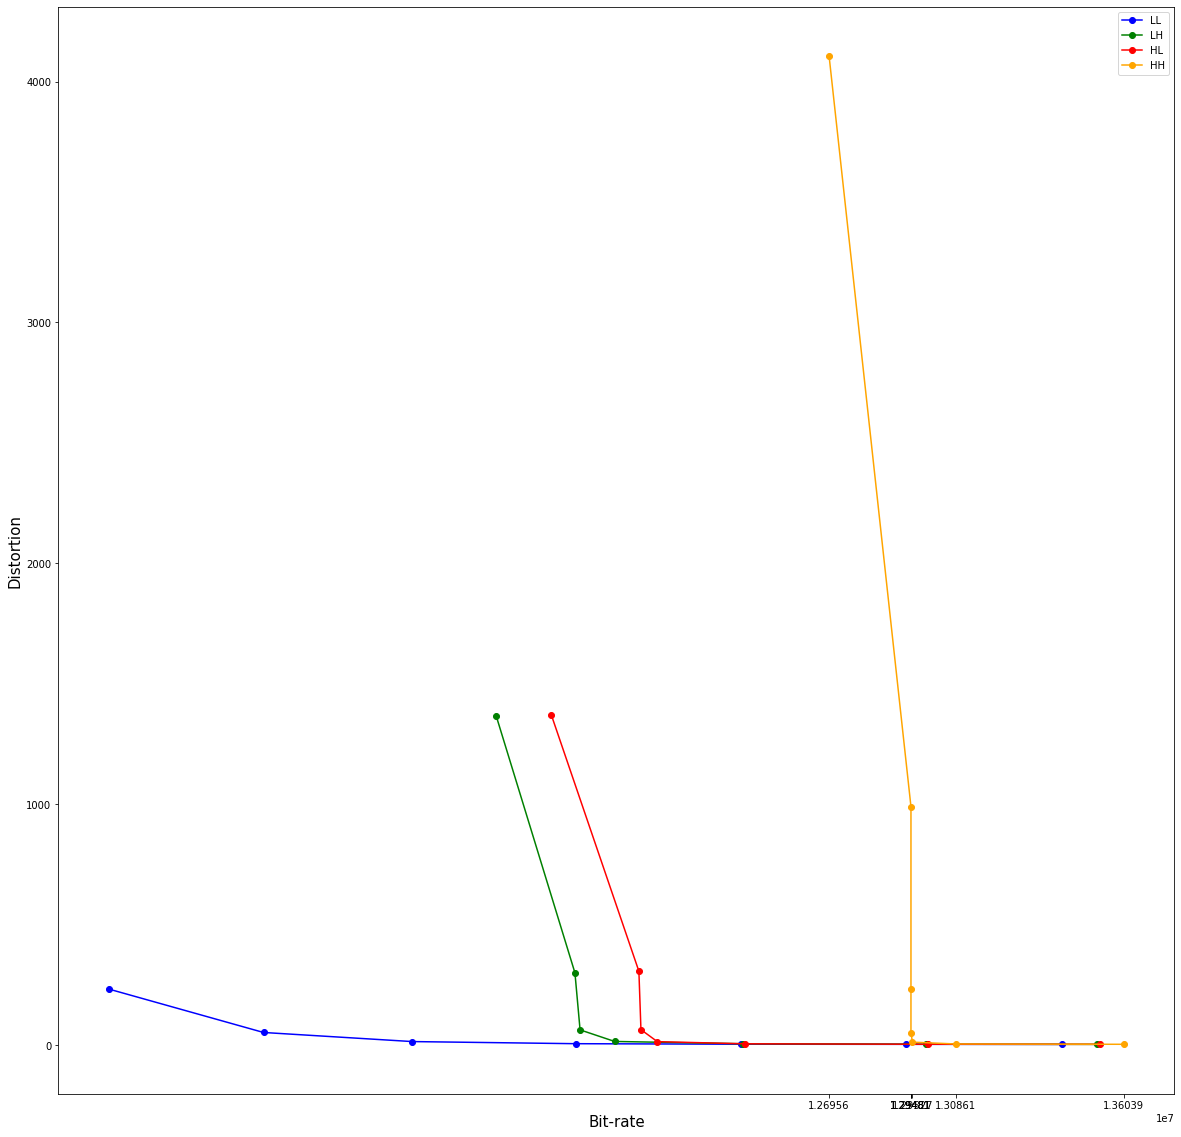

In [29]:
colores={'LL':"b", "LH":"g", "HL":"r", "HH":"orange"}
fig=plt.figure(figsize=(20,20))
spec = fig.add_gridspec(ncols=1, nrows=3)
for tipo in totales:
    plot = plt.plot([i[0] for i in totales[tipo]],[i[1] for i in totales[tipo]],'-bo', color=colores[tipo],label=str(tipo), linestyle='-')
    plt.xticks([i[0] for i in totales[tipo]])
plt.ylabel("Distortion", fontsize = 15, color = 'black')
plt.xlabel("Bit-rate", fontsize = 15, color = 'black')
plt.legend(loc="upper right")
plt.show()

In [31]:
slopes = [None]*C
for c in range(C):
    # Slopes of each pair of points
    slopes[c] = [] 
    for i in range(len(curve[c])-1):
        distortion_decrease = curve[c][i][1] - curve[c][i+1][1]
        rate_increase = curve[c][i+1][0] - curve[c][i][0]
        if(rate_increase==0): rate_increase=0.1
        slope = distortion_decrease/rate_increase
        slopes[c].append((slope, rate_increase, c))
    print(slopes[c])

[(3.2603339290324214e-07, -481953.0, 0), (1.070704248349233e-06, -508211.0, 0), (4.199553117132088e-06, -510380.0, 0), (1.747291720594973e-05, -504383.0, 0), (8.229043888124425e-05, -458860.0, 0), (0.00037768266441374517, -476430.0, 0)]
[(1.0073571015944378e-06, -528033.0, 1), (3.776897091454735e-06, -566255.0, 1), (2.4095883518423982e-05, -394709.0, 1), (0.00045144809665440233, -106502.0, 1), (0.014948707148554433, -15849.0, 1), (0.004392595923103992, -242769.0, 1)]
[(8.569085946170929e-07, -529988.0, 2), (3.212804143233318e-06, -564537.0, 2), (3.3303343490774306e-05, -269459.0, 2), (0.0009831474562314588, -50610.0, 2), (0.03825487332327515, -6342.0, 2), (0.003940906791565799, -270337.0, 2)]
[(2.5983629918995453e-06, -517837.0, 3), (5.6874126091892676e-05, -133359.0, 3), (0.00862989112296895, -4609.0, 3), (-6.187332518128142, 29.0, 3), (-7586.514756266274, 0.1, 3), (0.012342873814072999, -252494.0, 3)]


In [32]:
total_slopes = []
for c in range(C):
    total_slopes += slopes[c]
print(total_slopes)

[(3.2603339290324214e-07, -481953.0, 0), (1.070704248349233e-06, -508211.0, 0), (4.199553117132088e-06, -510380.0, 0), (1.747291720594973e-05, -504383.0, 0), (8.229043888124425e-05, -458860.0, 0), (0.00037768266441374517, -476430.0, 0), (1.0073571015944378e-06, -528033.0, 1), (3.776897091454735e-06, -566255.0, 1), (2.4095883518423982e-05, -394709.0, 1), (0.00045144809665440233, -106502.0, 1), (0.014948707148554433, -15849.0, 1), (0.004392595923103992, -242769.0, 1), (8.569085946170929e-07, -529988.0, 2), (3.212804143233318e-06, -564537.0, 2), (3.3303343490774306e-05, -269459.0, 2), (0.0009831474562314588, -50610.0, 2), (0.03825487332327515, -6342.0, 2), (0.003940906791565799, -270337.0, 2), (2.5983629918995453e-06, -517837.0, 3), (5.6874126091892676e-05, -133359.0, 3), (0.00862989112296895, -4609.0, 3), (-6.187332518128142, 29.0, 3), (-7586.514756266274, 0.1, 3), (0.012342873814072999, -252494.0, 3)]


In [33]:
sorted_slopes = sorted(total_slopes, key=lambda tup: tup[0])[::-1]
print(sorted_slopes)

[(0.03825487332327515, -6342.0, 2), (0.014948707148554433, -15849.0, 1), (0.012342873814072999, -252494.0, 3), (0.00862989112296895, -4609.0, 3), (0.004392595923103992, -242769.0, 1), (0.003940906791565799, -270337.0, 2), (0.0009831474562314588, -50610.0, 2), (0.00045144809665440233, -106502.0, 1), (0.00037768266441374517, -476430.0, 0), (8.229043888124425e-05, -458860.0, 0), (5.6874126091892676e-05, -133359.0, 3), (3.3303343490774306e-05, -269459.0, 2), (2.4095883518423982e-05, -394709.0, 1), (1.747291720594973e-05, -504383.0, 0), (4.199553117132088e-06, -510380.0, 0), (3.776897091454735e-06, -566255.0, 1), (3.212804143233318e-06, -564537.0, 2), (2.5983629918995453e-06, -517837.0, 3), (1.070704248349233e-06, -508211.0, 0), (1.0073571015944378e-06, -528033.0, 1), (8.569085946170929e-07, -529988.0, 2), (3.2603339290324214e-07, -481953.0, 0), (-6.187332518128142, 29.0, 3), (-7586.514756266274, 0.1, 3)]


## Bit Rate

In [50]:
R = 14352 # Bit budget
spent_br = 0 # Spent bit rate
i = 0
optimal_progression = []
while True:
    try:
        spent_br += sorted_slopes[i][1]
        if spent_br < R:
            optimal_progression.append(sorted_slopes[i])
        else:
            break
        i += 1
    except:
        break
print("Optimal progression of RD points =", optimal_progression)
br = sum([i[1] for i in optimal_progression])
print("Achieved rate =", br)
for c in range(C): # 4 = four curves
    br = sum([i[1] for i in optimal_progression if i[2] == c])
    print("Rate for curve {} = {}".format(c,br))

Optimal progression of RD points = [(0.03825487332327515, -6342.0, 2), (0.014948707148554433, -15849.0, 1), (0.012342873814072999, -252494.0, 3), (0.00862989112296895, -4609.0, 3), (0.004392595923103992, -242769.0, 1), (0.003940906791565799, -270337.0, 2), (0.0009831474562314588, -50610.0, 2), (0.00045144809665440233, -106502.0, 1), (0.00037768266441374517, -476430.0, 0), (8.229043888124425e-05, -458860.0, 0), (5.6874126091892676e-05, -133359.0, 3), (3.3303343490774306e-05, -269459.0, 2), (2.4095883518423982e-05, -394709.0, 1), (1.747291720594973e-05, -504383.0, 0), (4.199553117132088e-06, -510380.0, 0), (3.776897091454735e-06, -566255.0, 1), (3.212804143233318e-06, -564537.0, 2), (2.5983629918995453e-06, -517837.0, 3), (1.070704248349233e-06, -508211.0, 0), (1.0073571015944378e-06, -528033.0, 1), (8.569085946170929e-07, -529988.0, 2), (3.2603339290324214e-07, -481953.0, 0), (-6.187332518128142, 29.0, 3), (-7586.514756266274, 0.1, 3)]
Achieved rate = -7393876.9
Rate for curve 0 = -2940